In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('../data/salary.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


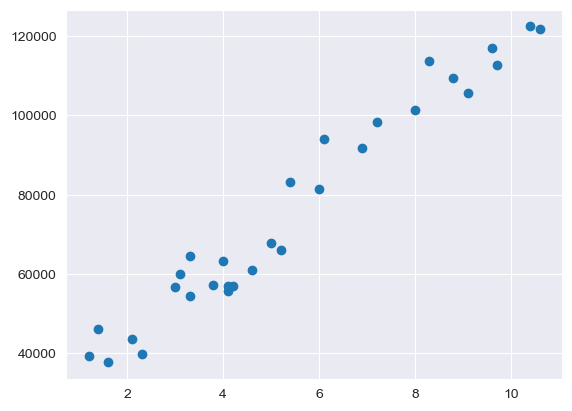

In [2]:
plt.scatter(data=df, x='YearsExperience', y='Salary')
plt.show()

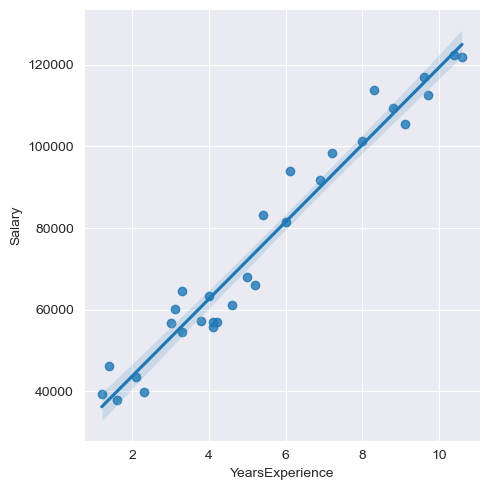

In [3]:
sns.lmplot(x="YearsExperience", y="Salary", data=df)

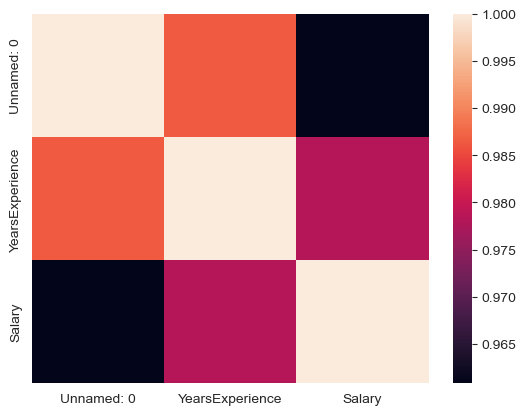

In [4]:
corr = df.corr()
sns.heatmap(corr);

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']], df['Salary'], test_size=0.2, random_state=42)

In [6]:
# Create a LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train.to_numpy(), y_train.to_numpy())

LinearRegression()

In [7]:

print(model.intercept_)

print(model.coef_)

24380.20147947369
[9423.81532303]


In [8]:
y_pred = model.predict(X_test)

y_pred

/Users/mucham/opt/anaconda3/envs/statistics/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

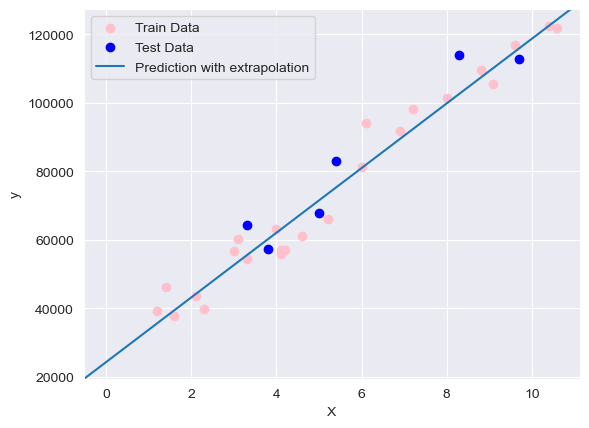

In [9]:
# Visualize the results
plt.scatter(X_train, y_train, color='pink', label='Train Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
# plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.axline((0, model.intercept_), slope=model.coef_[0], color='C0', label='Prediction with extrapolation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Mean Absolute Error (MAE): This metric represents the average absolute difference between the predicted values and the actual values. It gives you an idea of how far, on average, the predictions are from the actual values.

Mean Squared Error (MSE): MSE is the average of the squared differences between the predicted values and the actual values. It penalizes larger errors more heavily than smaller ones.

R-squared (Coefficient of determination): R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an indication of how well your model fits the data. A higher R-squared value indicates a better fit.

In [10]:
# Predict on the test data
y_pred = model.predict(X_test.to_numpy())

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test.to_numpy(), y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test.to_numpy(), y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (Coefficient of determination)
r2 = r2_score(y_test.to_numpy(), y_pred)
print("R-squared:", r2)

Mean Absolute Error: 6286.453830757745
Mean Squared Error: 49830096.855908334
R-squared: 0.9024461774180498


Mean Absolute Error (MAE): The MAE value you've calculated is approximately 6286.45. This means that, on average, your model's predictions are off by about $6286.45 in terms of the actual salary values. Lower MAE values indicate better accuracy, so a smaller MAE would be desirable.

Mean Squared Error (MSE): The MSE value you've calculated is approximately 49830096.86. This value represents the average of the squared differences between the predicted and actual salary values. Since it's squared, MSE is more sensitive to large errors. The value of MSE depends on the scale of your target variable. In this case, the MSE is relatively high, suggesting that there might be some larger prediction errors.

R-squared (Coefficient of Determination): The R-squared value you've calculated is approximately 0.9024. R-squared ranges from 0 to 1 and represents the proportion of the variance in the dependent variable (salary) that is explained by the independent variable (years of experience) through the model. In this case, an R-squared of 0.9024 indicates that about 90.24% of the variability in salary can be explained by the linear relationship with years of experience. A higher R-squared value indicates that the model is able to explain a larger proportion of the variance in the target variable, which is generally desirable.

In [49]:
# save model for future usages
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)